In [41]:
import pandas as pd #1
import numpy as np #2
import matplotlib.pyplot as plt #3
import plotly.express as px #4

# Ma'lumotlar to'plami bilan tanishish

Bu erda biz pandas to'plami tomonidan taqdim etilgan turli funktsiyalardan foydalangan holda ma'lumotlar to'plamini ko'rib chiqamiz

In [42]:
sh=pd.read_csv('score.csv')

In [43]:
sh

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [44]:
sh.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [45]:
sh.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [46]:
sh.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [49]:
print("Ma'lumotlar o'lchami: ", sh.shape)
sh.corr()

Ma'lumotlar o'lchami:  (25, 2)


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Ballarni soatlar o'zgarganda nuqtali tasviri

In [48]:
px.scatter(sh,x="Hours",y="Scores",template="plotly_dark")

# Ballar va soatlarning o'zgarish dinamikasi

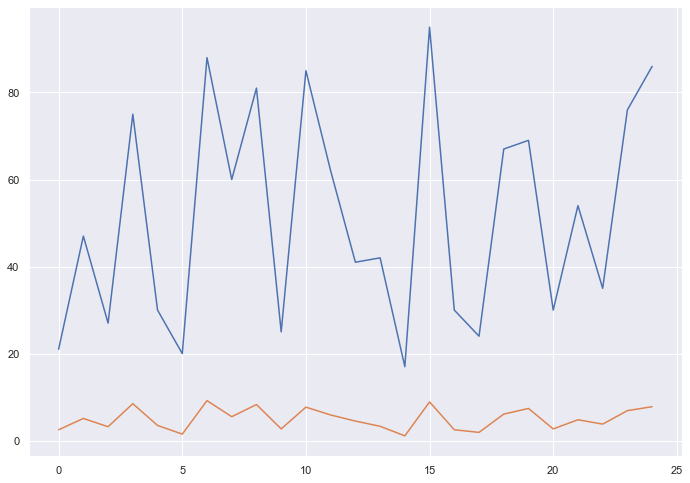

In [50]:
score=sh["Scores"]
time=sh["Hours"]
plt.plot(score)
plt.plot(time)
#plt.show()

In [10]:
px.bar(sh,x="Hours",y="Scores",template="plotly_dark")

(array([[25.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  5.,  4.,  3.,  1.,  2.,  4.,  2.,  3.]]),
 array([ 1.1 , 10.49, 19.88, 29.27, 38.66, 48.05, 57.44, 66.83, 76.22,
        85.61, 95.  ]),
 <a list of 2 BarContainer objects>)

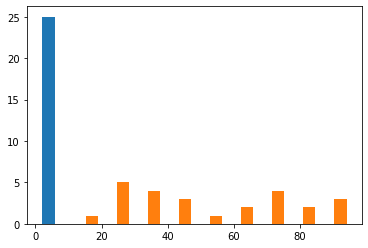

In [11]:
plt.hist(sh)

In [12]:
sh.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

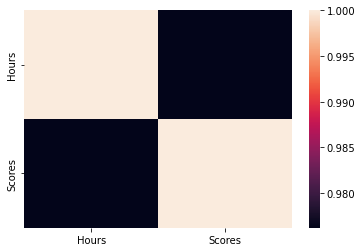

In [13]:
import seaborn as sns
sns.heatmap(sh.corr())

Xususiyatlarni normallashtirish

normallashtirishdan oldingi diapazon:  8.1


<AxesSubplot:xlabel='Hours', ylabel='Count'>

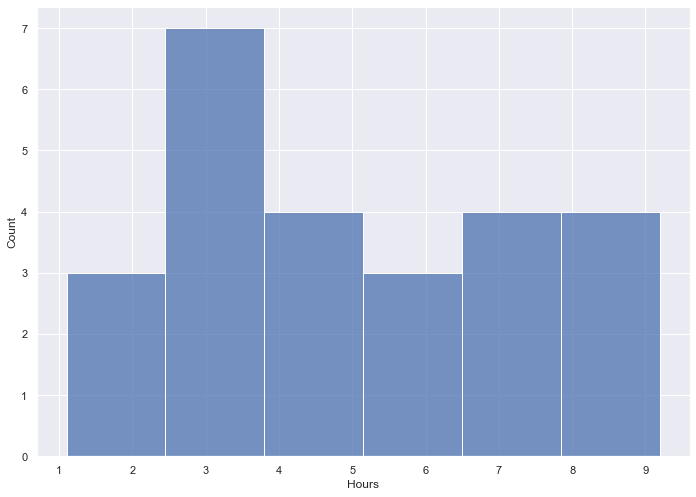

In [51]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=3)
sns.set(rc={'figure.figsize':(11.7,8.27)})



print('normallashtirishdan oldingi diapazon: ', np.ptp(sh['Hours']))
sns.histplot(data = sh['Hours'])

In [20]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(sh.drop('Scores', axis=1))

In [21]:
y_train = sh['Scores']

In [22]:
sgdr = SGDRegressor()
sgdr.fit(X_norm, y_train)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

number of iterations completed: 140, number of weight updates: 3501.0


In [23]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:   w: {w_norm}, b:{b_norm}")

model parameters:   w: [24.133], b:[51.373]


In [24]:
y_pred_sgd = sgdr.predict(X_norm)

In [25]:
temp_sh = pd.DataFrame(X_norm, y_pred_sgd).reset_index().rename(columns = {0: 'hours', 'index': 'score'})
temp_sh.head()

,score,hours
0,26.869919,-1.015328
1,52.231165,0.035569
2,33.697947,-0.732394
3,85.395871,1.409819
4,36.624244,-0.611137


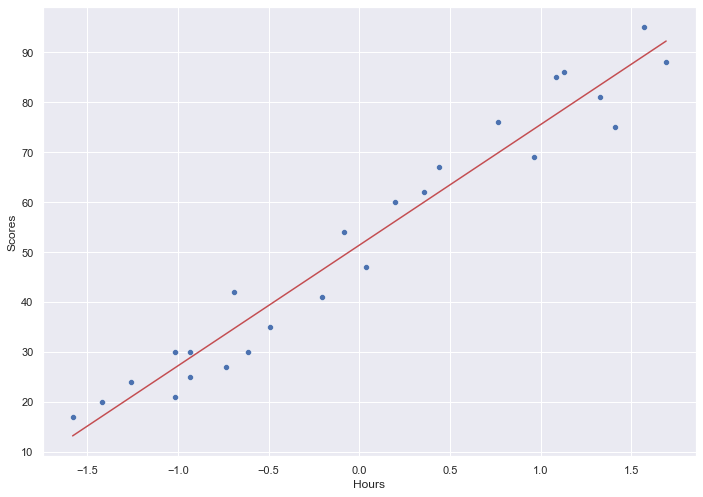

In [30]:
x = np.linspace(temp_sh['Hours'].min(),temp_sh['Hours'].max(),2)
y = w_norm*x+b_norm
sns.scatterplot(x=temp_sh['Hours'], y=sh['Scores'])
plt.plot(x, y, '-r')

In [34]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(sh.drop('Scores', axis=1))

In [35]:

y_pred_sgd = sgdr.predict(X_norm)

In [36]:
temp_sh = pd.DataFrame(X_norm, y_pred_sgd).reset_index().rename(columns = {0: 'Hours', 'index': 'Sacore'})
temp_sh.head()

,Sacore,Hours
0,26.869919,-1.015328
1,52.231165,0.035569
2,33.697947,-0.732394
3,85.395871,1.409819
4,36.624244,-0.611137
